
# S07T01_Hypothesis_Testing
Sprint 7.Task 1. Hypothesis Testing

## Description
Learn how to perform hypothesis testing with Python.

Level 1
- Exercise 1
Take a data set you like and select an attribute from the data set. Calculate the p-value and say whether it disproves the null hypothesis by taking an alpha of 5%. 

Level 2
- Exercise 2
Continue with the data set you like and select two other attributes from the data set. Calculate the p-values and say whether they disprove the null hypothesis by taking an alpha of 5%.

Level 3 
- Exercise 3
Continue with the data set you like and select three attributes from the data set. Calculate the p-value and say whether it disproves the null hypothesis by taking an alpha of 5%.


------  
#### Explanation of Hypothesis testing:  
(🗨️ from  https://towardsdatascience.com/hypothesis-testing-explained-as-simply-as-possible-6e0a256293cf)
![](2022-02-16-12-05-14.png)  

------  
#### Explanation of p-value:  
(🗨️ from https://en.wikipedia.org/wiki/P-value)  
![](2022-02-16-12-16-29.png)

------
#### Careful, Misuse of p-value:
(🗨️ from https://en.wikipedia.org/wiki/P-value)  
![](2022-02-16-12-23-32.png)

# Dataset Information:
We are going to select the dataset of the 2022 Hackathon MWC Barcelona (Mobile World Congress)
## 🖥 CHALLENGE
### Background  
Nuwefruit is a startup that seeks to revolutionize the habits of the population by encouraging the consumption of fruit on a daily basis. For this reason, the company specializes in the sale of fruit at home, which thanks to its last mile optimization algorithm allows it to have very low logistics costs. This allows Nuwefruit to sell fruit at a lower price than its competitors. Its catalog is based on the sale of more than 20 types of fruit, which have the best nutritional properties.

### Overview: the dataset and challenge

Two datasets will be used: the first one contains data on Nuwefruit's customers and the other one contains data on the orders placed by them.

The customer dataset 'CLIENT TABLE' contains the following variables:


|Column |Description |
|---------|---------|
|CLIENT ID:|Unique identifier of the customer  
|CLIENT_SEGMENT:|Customer segment  
|AVG CONSO: | Average monthly consumption of the customer calculated at the end of 2020 (in pieces of fruit)
|AVG BASKET SIZE: |Customer's average basket size calculated at the end of 2020 (in pieces of fruit)
|RECEIVED_COMMUNICATION:| 1 = Received promotion of your products / 0 = did not receive it


### Dataset Preparation

In [32]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [33]:
# Import dataset
df_clients = pd.read_csv("mwc22-client_table.csv", decimal = ',')

In [34]:
# Column names cleansing
df_clients.columns = df_clients.columns.str.lower()
df_clients.columns = df_clients.columns.str.replace(" ","_")
df_clients.rename_axis('client_id', inplace=True)
df_clients.columns

Index(['client_id', 'client_segment', 'avg_conso', 'avg_basket_size',
       'received_communication'],
      dtype='object')

In [35]:
# Dataset info
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   client_id               35884 non-null  int64  
 1   client_segment          35884 non-null  int64  
 2   avg_conso               35884 non-null  float64
 3   avg_basket_size         35884 non-null  float64
 4   received_communication  35884 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1.4 MB


In [36]:
# Sort by client_id
df_clients.sort_index(inplace=True)

In [37]:
# Dataset describe
round(df_clients.describe(include='all'),2)

,client_id,client_segment,avg_conso,avg_basket_size,received_communication
count,35884.00,35884.00,35884.00,35884.00,35884.00
mean,27060578.92,3.12,64.53,181.22,0.51
std,8835076.38,1.51,64.38,129.60,0.50
min,18073108.00,1.00,0.83,10.00,0.00
25%,20533114.25,2.00,20.83,100.00,0.00
50%,24621903.00,3.00,50.00,160.00,1.00
75%,32985383.25,4.00,88.17,225.00,1.00
max,48365940.00,6.00,2433.33,3400.20,1.00


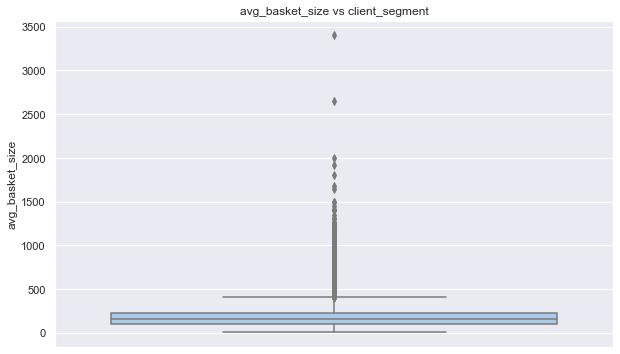

In [38]:
# Plot Boxplot of complete dataset
sns.set_theme(palette="pastel")
fig, ax = plt.subplots(figsize=(10,6))
plt.title("avg_basket_size vs client_segment")
sns.boxplot(y = 'avg_basket_size',data = df_clients);

## Level 1
### - Exercise 1  

>Take a data set you like and select an attribute from the data set.    
Calculate the p-value and say whether it disproves the null hypothesis by taking an alpha of 5%.  
 
As seen on describe function, the mean of the avg_basket_size  (Customer's average basket size) is 181.22.  
But, as we see on the boxplot graphic, there are a lot of outlayers that may be distorting the real mean avg_basket_size of the whole population.

Let's plot our data (without outlayers) to see if it follows a normal distribution:

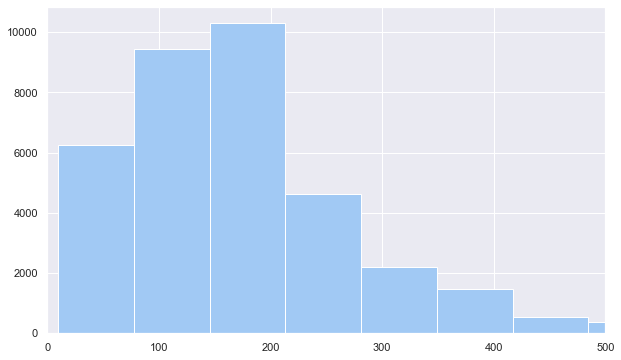

In [39]:
# Plot Histogram just from 0 to 500 avg_basket_size
# Prepare data
data_x = df_clients['avg_basket_size']
# Render
fig, ax = plt.subplots(figsize=(10,6))
ax.set_xlim(0,500)
ax.hist(data_x,bins= 50);
plt.show()

It seems that probably is a normal distribution and then, there are outlayers.

### First Hipothesis - HA: µ < 181.22 :

In [40]:
result = stats.ttest_1samp(data_x, 181.22, alternative = 'less')
print(result)

Ttest_1sampResult(statistic=-0.0020320872904630648, pvalue=0.49918932066841454)


The t-statistic is -0.0020 and the p-value is 0.4992  

### Interpret the results.

>The two hypotheses for this particular one sample t-test are as follows:  
* H0: µ = 181.22 (the mean avg_basket_size is 181.22 fruits) (sample mean)
* HA: µ < 181.22 (the mean avg_basket_size is less than 181.22 fruits) (because there are many outlayers)

*Because the p-value of our test (0.4992) is greater than alpha = 0.05, we fail to reject the null hypothesis of the test.  
We do not have sufficient evidence to say that the mean avg_basket_size for this particular client's dataset is less than 181.22 fruits.*

### Alternative 1: hypothesis - HA: µ = 176.2:

In [41]:
#Let's see the value of median
print( " The value of the median is %.1f" %data_x.median())
# And the value of quantile 56%
res = np.quantile( data_x, 0.55)
print( " The value of the quantile 0.55 is %.2f" %res)


 The value of the median is 160.0
 The value of the quantile 0.55 is 176.25


 The value of the median is 160.0  
 The value of the quantile 0.55 is 176.25

In [42]:
result = stats.ttest_1samp(data_x, 176.2)
print(result)

Ttest_1sampResult(statistic=7.335219667794772, pvalue=2.2603157159100853e-13)


The t-statistic is 7.3352 and the p-value is 2.2603e-13 

### Interpret the results.

>The two hypotheses for this particular one sample t-test are as follows:

* H0: µ = 176.25 (the mean avg_basket_size is 176.25 fruits)

* HA: µ ≠ 176.25 (the mean avg_basket_size is 176.25 fruits)

*Because the p-value of our test (1.943e-13) is lower than alpha = 0.05, we reject the null hypothesis of the test.  
We have sufficient evidence to say that the mean avg_basket_size for this particular client's dataset is different than 176.25 fruits.*  

### Alternative 2: hypothesis - HA: µ = 180.2

In [43]:
result = stats.ttest_1samp(data_x, 180.2, alternative = 'greater')
print(result)

Ttest_1sampResult(statistic=1.488803926691011, pvalue=0.0682738981108959)


The t-statistic is 1.48 and the p-value is 0.068 

### Interpret the results.

The two hypotheses for this particular one sample t-test are as follows:

H0: µ = 180.2 (the mean avg_basket_size is 180.2 fruits)

HA: µ ≠ 180.2 (the mean avg_basket_size is greater than 180.2 fruits)

Because the p-value of our test (0.068) is higher than alpha = 0.05, we fail to reject the null hypothesis of the test.  
We do not have sufficient evidence to say that the mean avg_basket_size for this particular client's dataset is different from 180.2 fruits.

## Level 2
### - Exercise 2
Continue with the data set you like and select two other attributes from the data set. Calculate the p-values and say whether they disprove the null hypothesis by taking an alpha of 5%.

## Level 3 
### - Exercise 3
Continue with the data set you like and select three attributes from the data set. Calculate the p-value and say whether it disproves the null hypothesis by taking an alpha of 5%.
